ACCOMMODATES:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'id' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['accommodates','property_type'], delimiter=',', encoding='latin-1')




# Verificar si la columna 'id' existe en el DataFrame
if 'accommodates' in data.columns:
    # Tipo de dato
    tipo_dato = data['accommodates'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['accommodates'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['accommodates'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['accommodates'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['accommodates'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'accommodates':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'accommodates' no existe en el DataFrame.")

Columna 'accommodates':
 - Tipo de dato: int64
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 17
 - Cantidad de datos totales: 279712


In [6]:
print(data['accommodates'].describe())
print(data['accommodates'].value_counts().sort_index())

count    279712.000000
mean          3.288736
std           2.133379
min           0.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          16.000000
Name: accommodates, dtype: float64
accommodates
0         85
1      25813
2     118332
3      27936
4      57260
5      13527
6      19455
7       3697
8       6514
9       1140
10      2630
11       367
12      1052
13       197
14       331
15       214
16      1162
Name: count, dtype: int64


Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

ANALISIS A ESCALA REAL CON OUTLIERS Y VALORES MAYORES A 0 


In [3]:
# Cantidad de filas antes de aplicar el filtro
total_antes = data['accommodates'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores iguales a 0
valores_validos = data['accommodates'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después de filtrar
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se eliminaron (nulos o 0)
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas en escala natural
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'accommodates' (escala natural, excluyendo valores 0):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")


Cantidad de valores eliminados (dropeados): 85

Análisis Cuantitativo de 'accommodates' (escala natural, excluyendo valores 0):
 - Promedio: 3.29
 - Mínimo: 1
 - Máximo: 16
 - Desviación estándar: 2.13
 - Q1 (25%): 2.0
 - Q2 / Mediana (50%): 2.0
 - Q3 (75%): 4.0
 - Q4 (100%): 16.0
 - Varianza: 4.549398736913467
 - Curtosis (Kurtosis): 7.4502
 - Asimetría (Skewness): 2.1994


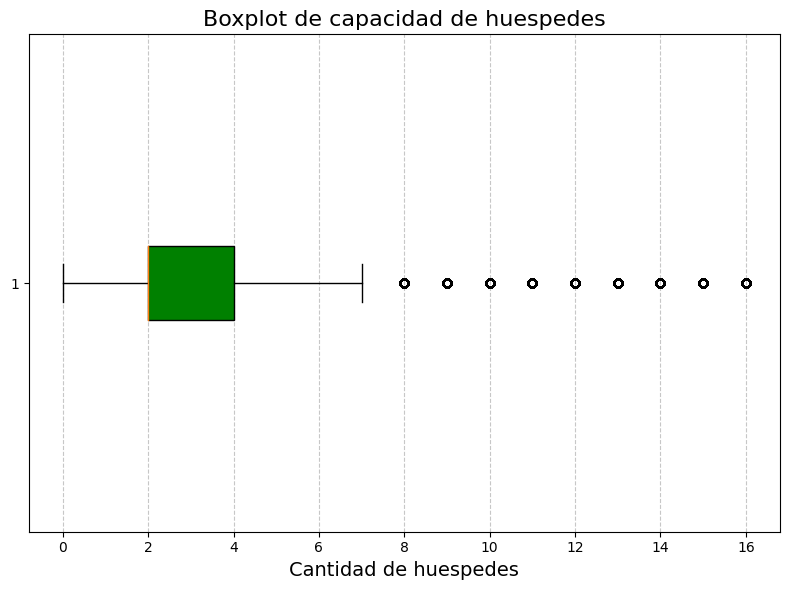

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar únicamente la columna 'review_scores_value' del archivo CSV


# Verificar si la columna 'review_scores_value' existe en el DataFrame
if 'accommodates' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['accommodates'].dropna()

    # Crear el gráfico boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(valores_validos, vert=False, patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title('Boxplot de capacidad de huespedes', fontsize=16)
    plt.xlabel('Cantidad de huespedes', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'review_scores_value' no existe en el DataFrame.")

ANALISIS CUANTITATIVOS SIN OUTLIERS

In [13]:
# 1. Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['accommodates'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 2. Cálculo de IQR y límites
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 4. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 5. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 6. Mostrar resultados
    print(f"Cantidad de outliers detectados: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'accommodates' (escala natural, sin outliers):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados: 13607

Análisis Cuantitativo de 'accommodates' (escala natural, sin outliers):
 - Promedio: 2.95
 - Mínimo: 1
 - Máximo: 7
 - Desviación estándar: 1.46
 - Q1 (25%): 2.0
 - Q2 / Mediana (50%): 2.0
 - Q3 (75%): 4.0
 - Varianza: 2.1300
 - Curtosis (Kurtosis): -0.1430
 - Asimetría (Skewness): 0.8252


<Figure size 1400x800 with 0 Axes>

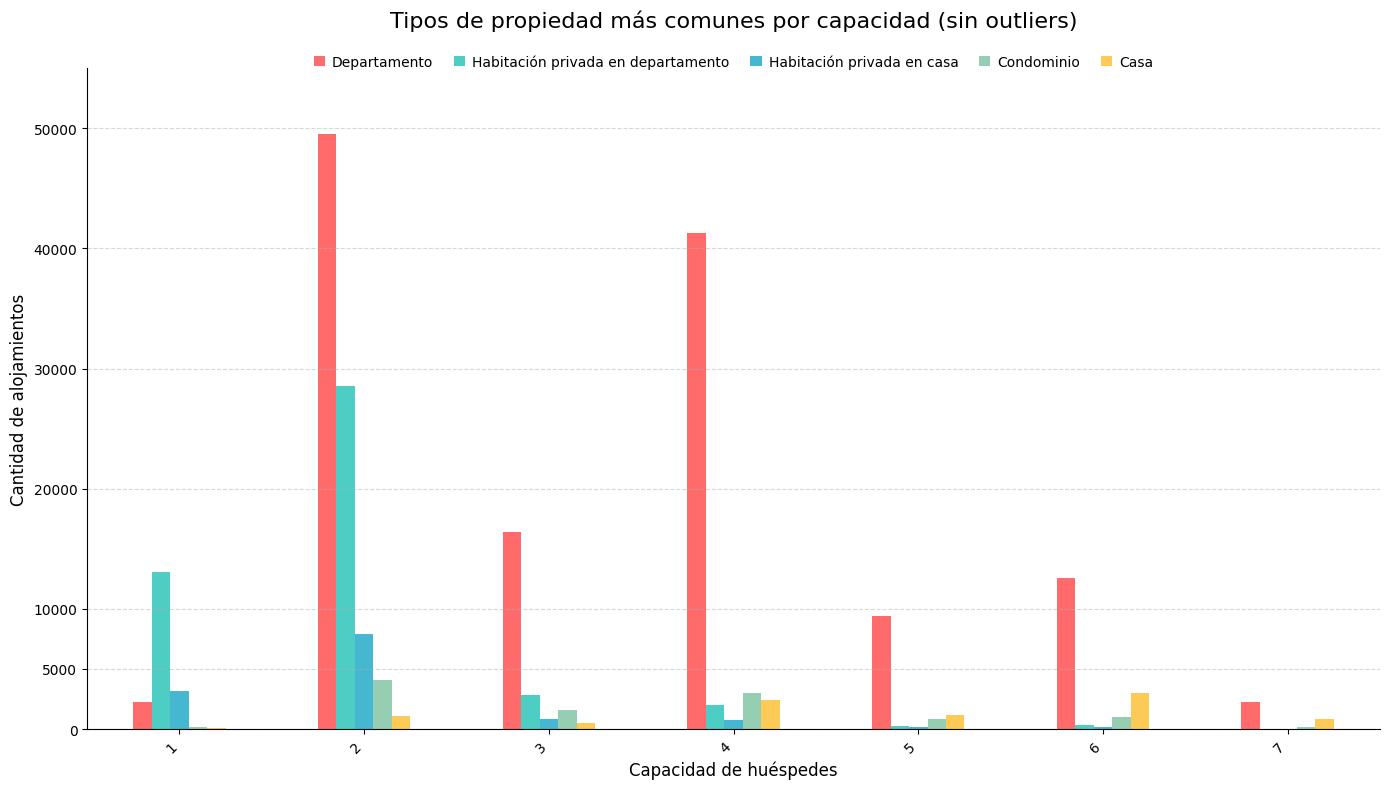

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar datos válidos
valores_validos = data[['accommodates', 'property_type']].dropna()
valores_validos = valores_validos[valores_validos['accommodates'] > 0]

# 2. Calcular cuartiles y límites para detectar outliers
q1 = valores_validos['accommodates'].quantile(0.25)
q3 = valores_validos['accommodates'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Filtrar valores sin outliers
sin_outliers = valores_validos[
    (valores_validos['accommodates'] >= limite_inferior) &
    (valores_validos['accommodates'] <= limite_superior)
]

# 4. Crear la tabla cruzada (accommodates vs property_type)
tabla = pd.crosstab(sin_outliers['accommodates'], sin_outliers['property_type'])

# 5. Seleccionar los 5 tipos de propiedad más frecuentes
top_tipos = tabla.sum().sort_values(ascending=False).head(5).index
tabla_filtrada = tabla[top_tipos]

# 6. Traducir nombres de columnas al español
traduccion_tipos = {
    'Entire apartment': 'Departamento',
    'Private room in apartment': 'Habitación privada en departamento',
    'Private room in house': 'Habitación privada en casa',
    'Entire house': 'Casa',
    'Entire condominium': 'Condominio'
}
tabla_filtrada.columns = [traduccion_tipos.get(col, col) for col in tabla_filtrada.columns]

# 7. Graficar
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
plt.figure(figsize=(14, 8))
ax = tabla_filtrada.plot(kind='bar', figsize=(14, 8), color=colores)

plt.title("Tipos de propiedad más comunes por capacidad", fontsize=16, pad=30)
plt.ylabel("Cantidad de alojamientos", fontsize=12)
plt.xlabel("Capacidad de huéspedes", fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.set_ylim(0, 55000)
ax.set_yticks([0, 5000, 10000, 20000, 30000, 40000, 50000])
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Quitar contornos innecesarios
for lado in ['top', 'right']:
    ax.spines[lado].set_visible(False)

# Leyenda horizontal
plt.legend(bbox_to_anchor=(0.5, 0.98), 
           loc='lower center', 
           ncol=5,
           frameon=False,
           handlelength=0.8,
           handletextpad=0.5,
           columnspacing=1.5)

plt.tight_layout()
plt.show()
